# Exercises - Data Science Sprint 04 - M04 T02
   **Graphical visualization of multiple variables**

## Exercise #1

Review the notebook named "03 EXAMINING DATA". Make a copy and execute all commands with all the dataset given.
In this exercise we can observe the different options that we can use with graphic libraries. 

This is the link to the external notebook: <a href="03 EXAMINING DATA.ipynb">03 EXAMINING DATA</a>

## Exercise #2

Given the data file "movies.dat", work on the file in order to process, transform and explore the dataset. 

The main objective is to prepare it in order to extract information. The final result must be a dataframe with 3 columns: Movie, Year, Genre (only one).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Import data from file. Notice that fields are separated by "::", with no header
movie = pd.read_csv("movies.dat", sep="::", encoding='latin-1', header=None, engine='python')
movie.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# Let's get the Year column, from column #1
movie['Year'] = movie[1].str[-5:-1].astype(int)
movie.head()

,0,1,2,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [3]:
# Let's get the Movie, so we take the column #1, depreciating the last 7 characters
movie['Movie'] = movie[1].str[0:-7]
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
 3   Year    3883 non-null   int32 
 4   Movie   3883 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 136.6+ KB


In [4]:
# Let's get the Genre column. In some rows we have more than one, but we are going to save only the first one
movie['Genre'] = movie[2].apply(lambda x: x.split('|')[0]).astype(str)
# Let's get rid of the previos columns
movie.drop(movie.columns[[0, 1, 2]], axis=1, inplace=True)
movie.head()

,Year,Movie,Genre
0,1995,Toy Story,Animation
1,1995,Jumanji,Adventure
2,1995,Grumpier Old Men,Comedy
3,1995,Waiting to Exhale,Comedy
4,1995,Father of the Bride Part II,Comedy


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    3883 non-null   int32 
 1   Movie   3883 non-null   object
 2   Genre   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


## Exercise #3

Showing your creativity, explain what do you think is relevant to show from the "movies.dat" dataset of the previous exercise.
Make one or two graphical representations and justify your choice.


In [6]:
# Let's see how many unique genres are in the data set
movie['Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

In [7]:
# In order to know better this dataset, let's see the min year and max year represented
print('Minimum Year showe on list:',movie['Year'].min())
print('Maximum Year showe on list:',movie['Year'].max())

Minimum Year showe on list: 1919
Maximum Year showe on list: 2000


### Showing movies per year

Taking into account the data given, it's is interesting to show how many movies have been made depending on the year. 

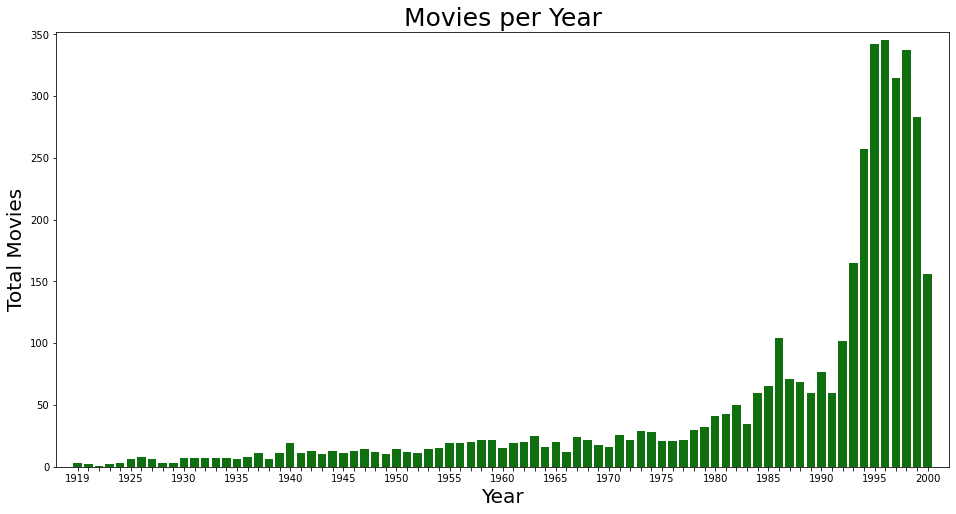

In [8]:
# Let's configure a sufficiently large plotting space for this graph
fig = plt.figure(figsize=(16,8))
cplot = sns.countplot(x=movie["Year"], color="Green") # Countplot based on Year column
plt.title('Movies per Year', size = 25)
plt.ylabel('Total Movies', size=20)
plt.xlabel('Year', size=20)
# Due that we have too many years to be displayed, let's us show only yaers in increments of 5
for index, label in enumerate(cplot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.margins(0.02) # Add margins to show left and right image 

### Showing genre change through years

Through all this years there are enough data to check the evolution of the most used genres and the end of the chart.

In [9]:
# Let's group the columns we want to work with, and count the number of movies for each Year/Genre
movie_g = movie.groupby(["Year", "Genre"], as_index = False)[["Movie"]].count()
movie_g.sample(10)

,Year,Genre,Movie
70,1939,Horror,1
35,1932,Drama,2
529,1994,Action,32
574,1997,Children's,11
489,1990,Horror,13
162,1953,Action,2
404,1981,Documentary,1
276,1966,Western,1
260,1965,Action,2
193,1956,Sci-Fi,5


In [10]:
# Let's pivot the table in order to prepare the data for the heatmap graphic
# All combination of Genre/Year with no data, will contain NaN values. I'm gonna keep them in order not to display them
# on the heatmap. In this way, it will be more clean the graph
movie_ph = movie_g.pivot(index='Genre', columns='Year')
movie_ph.head()

Movie                                               ...        \
Year        1919 1920 1921 1922 1923 1925 1926 1927 1928 1929  ...  1991   
Genre                                                          ...         
Action       1.0  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   6.0   
Adventure    1.0  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  ...   2.0   
Animation    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   2.0   
Children's   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   
Comedy       1.0  2.0  NaN  NaN  2.0  3.0  1.0  2.0  3.0  NaN  ...  22.0   

                                                                   
Year        1992  1993  1994  1995   1996  1997  1998  1999  2000  
Genre                                                              
Action      21.0  25.0  32.0  45.0   37.0  43.0  44.0  27.0  19.0  
Adventure    2.0   4.0   8.0  13.0   10.0  10.0   8.0   1.0   4.0  
Animation    3.0   4.0   4.0   8.0    6.0   4.0   7.0   7.0   6.0  
Children's   5.0   3.0   9.0   5.0    8.0  11.0   7.0   4.0   2.0  
Comedy      26.0  39.0  80.0  79.0  101.0  83.0  94.0  93.0  65.0  

[5 rows x 81 columns]

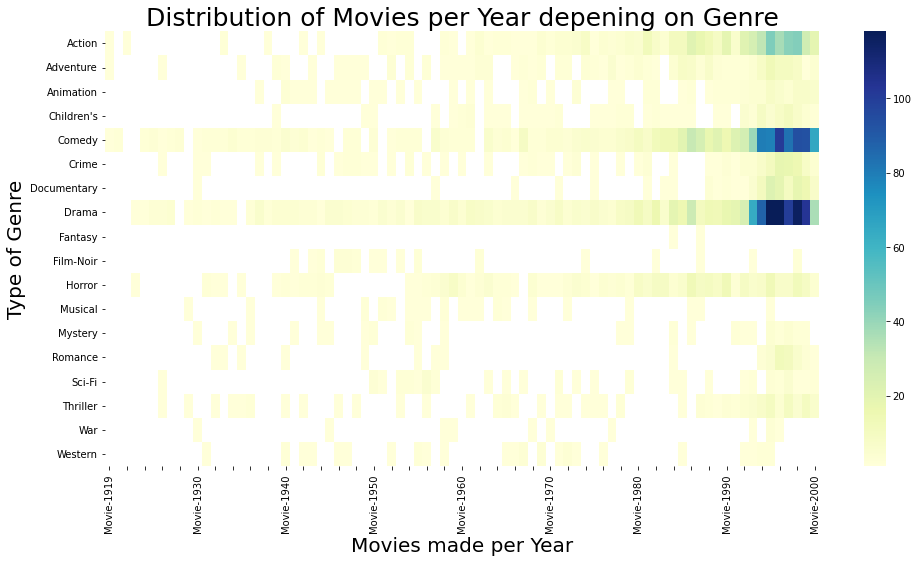

In [11]:
# Now let's show our heatmap
f, ax = plt.subplots(figsize=(16, 8))
# On this plot we do not ant any annotation only the colors.
cplot = sns.heatmap(movie_ph, annot=False, cmap="YlGnBu")
# let's us show this plot with the same increments of the preevious plot, 5 years
for index, label in enumerate(cplot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.title('Distribution of Movies per Year depening on Genre', fontsize=25)
plt.xlabel('Movies made per Year', fontsize=20)
plt.ylabel('Type of Genre', fontsize=20)
plt.show()

It's interesting to see how the evolution of genres shows us that Comedy and Drama movies as the most produced, and in 3rd position Action movies. The rest of the movies remain at low ratios.

On the other hand, I have to comment that on the Exercise #2 we have kept only one genre by movie. Maybe the final result could have been somehow different.